<a href="https://colab.research.google.com/github/veyselalevcan/Time_Series/blob/main/Predicting_Stock_Prices_Using_Monte_Carlo_Methods_in_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
from random import random
import matplotlib.pyplot as plt
from scipy.stats import norm
import yfinance as yf

In [4]:
amazon= yf.Ticker('AMZN')

In [12]:
tarihsel= amazon.history(start= '2013-01-01', end='2023-12-31')
tarihsel

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2013-01-02 00:00:00-05:00,12.804000,12.905000,12.663000,12.865500,65420000,0.0,0.0
2013-01-03 00:00:00-05:00,12.863500,13.044000,12.818500,12.924000,55018000,0.0,0.0
2013-01-04 00:00:00-05:00,12.879000,12.990000,12.832500,12.957500,37484000,0.0,0.0
2013-01-07 00:00:00-05:00,13.148500,13.486500,13.133500,13.423000,98200000,0.0,0.0
2013-01-08 00:00:00-05:00,13.353500,13.449000,13.178500,13.319000,60214000,0.0,0.0
...,...,...,...,...,...,...,...
2023-12-22 00:00:00-05:00,153.770004,154.350006,152.710007,153.419998,29480100,0.0,0.0
2023-12-26 00:00:00-05:00,153.559998,153.979996,153.029999,153.410004,25067200,0.0,0.0
2023-12-27 00:00:00-05:00,153.559998,154.779999,153.119995,153.339996,31434700,0.0,0.0


In [13]:
hist =tarihsel[['Close']]

In [14]:
hist.head()

,Close
Date,
2013-01-02 00:00:00-05:00,12.8655
2013-01-03 00:00:00-05:00,12.9240
2013-01-04 00:00:00-05:00,12.9575
2013-01-07 00:00:00-05:00,13.4230
2013-01-08 00:00:00-05:00,13.3190


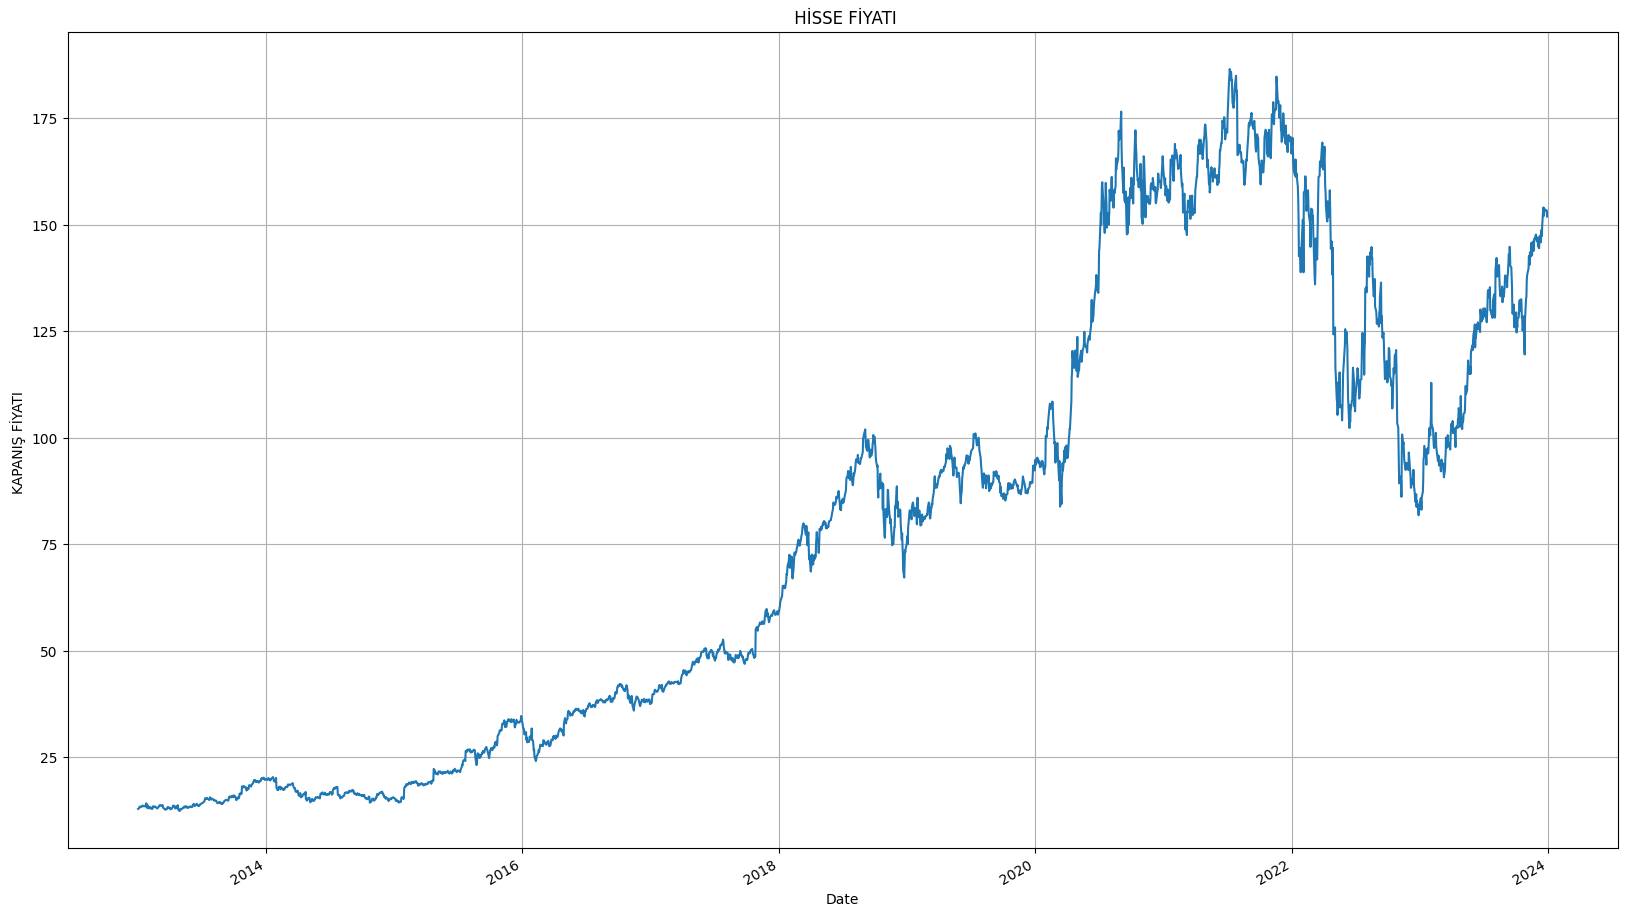

In [15]:
hist['Close'].plot(title= " HİSSE FİYATI",
                   ylabel= "KAPANIŞ FİYATI ", figsize=[20, 12])


plt.grid()

In [16]:
days = [i for i in range(1, len(hist['Close'])+1)]
price_orig = hist['Close'].tolist()
change = hist['Close'].pct_change().tolist()
change = change[1:]

mean = np.mean(change)
std_dev = np.std(change)
print('\nOrtalama yüzde değişim: ' + str(round(mean*100, 2)) + '%')
print('Yüzde değişimin Standart Sapması: ' +
      str(round(std_dev*100, 2)) + '%')


Ortalama yüzde değişim: 0.11%
Yüzde değişimin Standart Sapması: 2.06%


In [17]:
start_date = '2013-01-01'
end_date = '2023-12-31'

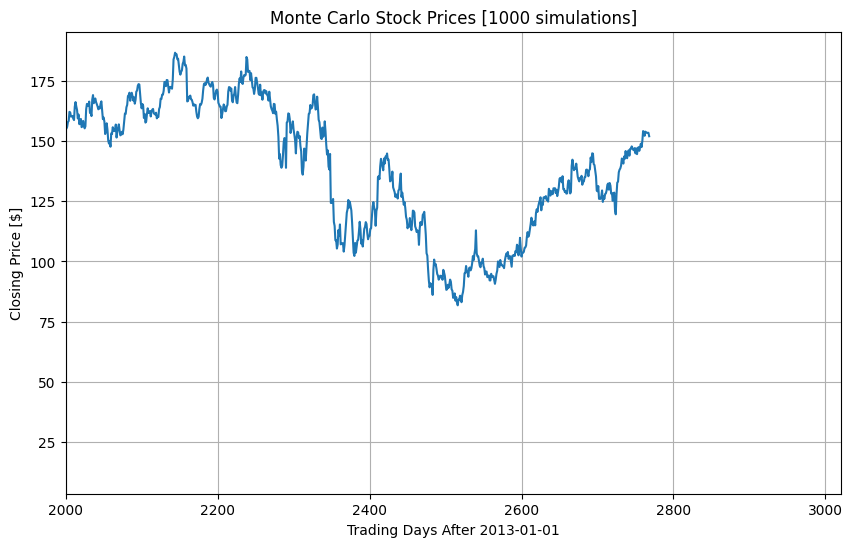

In [19]:
# Simülasyon Sayısı ve Tahmin Dönemi
simulations = 1000 # yani 200 adet tahmin yapıp karar verecek ,sayı ne kadar çok olursa o kadar iyi
days_to_sim = 1*252 # 1 yıldaki işlem sayısı

# Simülasyon için Şekil Başlatma
fig = plt.figure(figsize=[10, 6])
plt.plot(days, price_orig)
plt.title("Monte Carlo Stock Prices [" + str(simulations) + " simulations]")
plt.xlabel("Trading Days After " + start_date)
plt.ylabel("Closing Price [$]")
plt.xlim([2000, len(days)+days_to_sim])
plt.grid()

#Analiz için Listeleri Başlatma
close_end = []
above_close = []

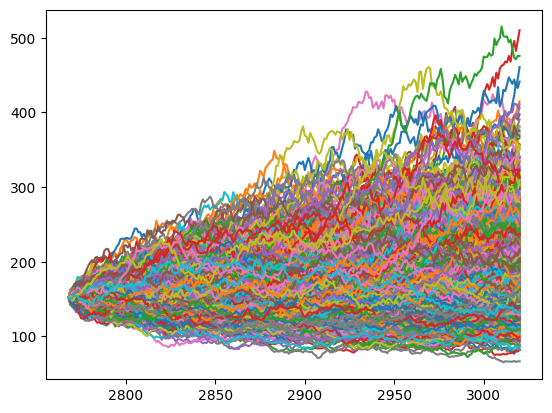

In [20]:
# İstenen Simülasyon Sayısı için Döngü İçin
for i in range(simulations):
    num_days = [days[-1]]
    close_price = [hist.iloc[-1, 0]]

    for j in range(days_to_sim):
        num_days.append(num_days[-1]+1)
        perc_change = norm.ppf(random(), loc=mean, scale=std_dev)
        close_price.append(close_price[-1]*(1+perc_change))

    if close_price[-1] > price_orig[-1]:
        above_close.append(1)
    else:
        above_close.append(0)

    close_end.append(close_price[-1])
    plt.plot(num_days, close_price)

In [21]:
average_closing_price = sum(close_end)/simulations
average_perc_change = (average_closing_price-
                       price_orig[-1])/price_orig[-1]
probability_of_increase = sum(above_close)/simulations
print('\nTahmini kapanış fiyatı =  '  +
  ' ' + str(round(average_closing_price, 2)))
print('1 yıl sonra beklenen yüzde artış: ' +
      str(round(average_perc_change*100, 2)) + '%')
print('1 yıl sonra hisse fiyatının artma olasılığı: ' +
      str(round(probability_of_increase*100, 2)) + '%')



Tahmini kapanış fiyatı =   199.95
1 yıl sonra beklenen yüzde artış: 31.6%
1 yıl sonra hisse fiyatının artma olasılığı: 76.0%
